In [525]:
import cv2
import numpy as np
from PIL import Image


# import pytesseract
import os 


def showImg(mat):
    rgbMAT = cv2.cvtColor(mat, cv2.COLOR_BGR2RGB)

    return Image.fromarray(rgbMAT)

def showMultipleImg(mats):
    from matplotlib import pyplot as plt
    def inner(x):
        x1 = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
        return Image.fromarray(x1) 
    
    l = list(map(inner, mats))
    for p in l:
        plt.figure()
        plt.imshow(p)
    

In [526]:
# process_directory('./imgs/')  # replace with your directory

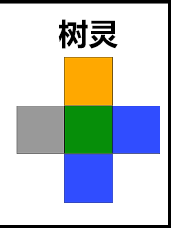

In [527]:
# cv recog coloured blocks
target_color = ['blue', 'pink', 'grey','orange', 'purple', 'green']
# 调色盘
color_dist = {'red': {'Lower': np.array([0, 60, 60]), 'Upper': np.array([6, 255, 255])},
              'blue': {'Lower': np.array([200, 0, 0]), 'Upper': np.array([255, 120, 100])},
              'pink': {'Lower': np.array([200, 110, 230]), 'Upper': np.array([251, 155, 255])},
              'grey': {'Lower': np.array([150, 150, 150]), 'Upper': np.array([155, 155, 155])},
              'orange': {'Lower': np.array([0, 126, 253]), 'Upper': np.array([5, 170, 255])},
              'purple': {'Lower': np.array([230, 0, 130]), 'Upper': np.array([255, 5, 215])},
              'green': {'Lower': np.array([0 , 128   ,0]), 'Upper': np.array([100, 255, 100])},
              'black': {'Lower': np.array([252, 252, 252]), 'Upper': np.array([255,255,255])},
              }
img = cv2.imread('imgs/card_17.png')
showImg(img)

In [528]:
# # 高斯模糊
# # img = cv2.GaussianBlur(img, (3,3), 0)
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
# # img = cv2.dilate(img, kernel, iterations=2)
# img = cv2.erode(img, kernel, iterations=3)

# for color in target_color:

#     # Define the color range
#     lower_range = color_dist[color]['Lower']  # lower range of color
#     upper_range = color_dist[color]['Upper']  # upper range of color

#     # Create a mask for the color
#     mask = cv2.inRange(img, lower_range, upper_range)

#     # Find contours in the mask
#     contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#     # Fill in the contours with a solid color (e.g., white)
#     color = tuple(map(lambda x: int(x), lower_range))
#     black_color = (0, 0, 0)
#     print(color)
#     for contour in contours:
#         cv2.drawContours(img, [contour], -1, color, thickness=cv2.FILLED)
#         # cv2.drawContours(img, [contour], -1, (255,255,255), 2)
#         # cv2.drawContours(img, [contour], -1, color, thickness=cv2.FILLED)
#         # cv2.drawContours(img, [contour], -1, color, thickness=cv2.FILLED)
        

# showImg(img)

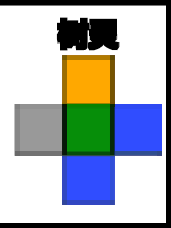

In [529]:
# preprocessing
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
# 高斯模糊
# afterGsB = cv2.GaussianBlur(img, (3,3), 0)
afterGsB = img

# afterDilate = cv2.dilate(afterGsB, kernel, iterations=3)
afterDilate = afterGsB
afterErode = cv2.erode(afterDilate, kernel, iterations=2)
# afterErode = afterDilate
# afterGsB = img
showImg(afterErode)

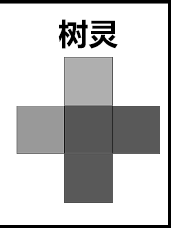

In [530]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
showImg(gray)

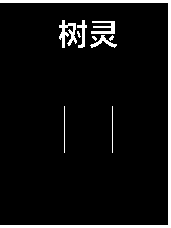

In [531]:
_, thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY_INV)
showImg(thresh)

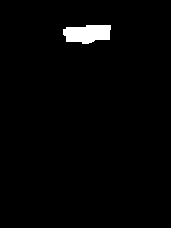

In [532]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
dilate = cv2.dilate(thresh, kernel, iterations=2)
erode = cv2.erode(dilate, kernel, iterations=4)

showImg(erode)

In [533]:
# contours, _ = cv2.findContours(erode, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# rois = []
# for cont in contours:
#     x, y, w, h = cv2.boundingRect(cont)
#     # region of interest
#     roi = gray[y:y+h, x: x+w]
#     rois.append(roi)
    

# # showImg(rois[1])
# showMultipleImg(rois)

In [534]:
# for roi in rois:
#     text = pytesseract.image_to_string(roi, lang='chi_sim')
#     print(text)


In [535]:
# 色调（H），饱和度（S），明度（V）
# afterHSV = cv2.cvtColor(afterGsB, cv2.COLOR_BGR2HSV)
# showImg(afterHSV)


In [536]:
# 粗线条的变细
# afterErode = cv2.erode(afterHSV, None, iterations = 2)
# showImg(afterErode)

blue
pink
grey
orange
purple
green


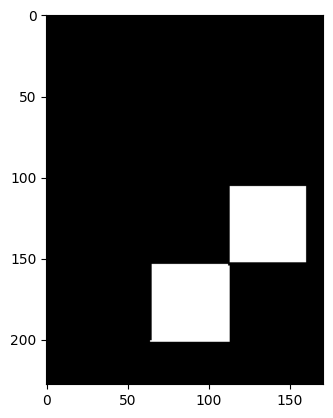

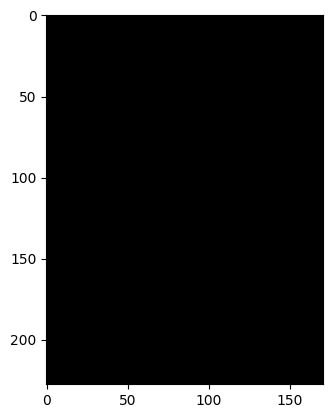

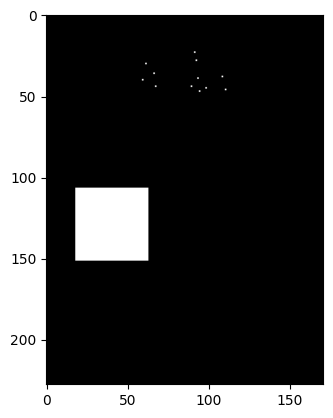

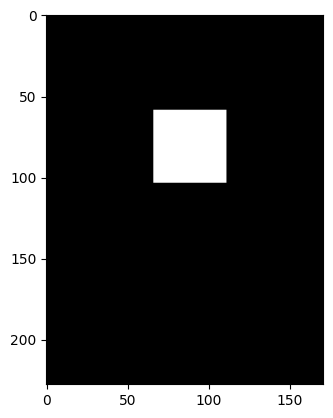

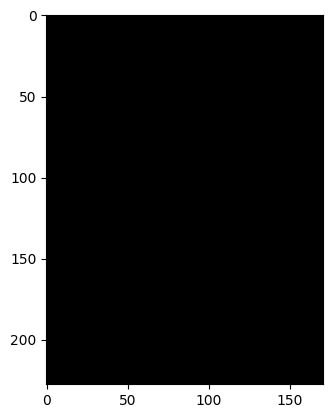

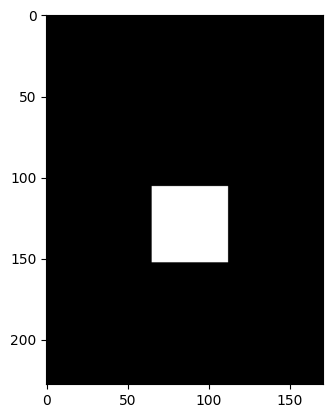

In [537]:
masks = []
for color in target_color:
    print(color)
    mask = cv2.inRange(img, color_dist[color]['Lower'], color_dist[color]['Upper'])
    masks.append(mask)

showMultipleImg(masks)

In [538]:
roi_masks = []
for mask in masks:
    
    contours, _ = cv2.findContours(mask, 
                                    cv2.RETR_EXTERNAL, 
                                    cv2.CHAIN_APPROX_SIMPLE)
    
    rois = []
    for cont in contours:
        x, y, w, h = cv2.boundingRect(cont)
        # add region of interest
        m = ( x, y, w, h)
        rois.append(m)
    
    roi_masks.extend(rois)

print(roi_masks)

[(64, 154, 49, 48), (113, 106, 47, 47), (18, 107, 45, 45), (94, 47, 1, 1), (110, 46, 1, 1), (98, 45, 1, 1), (89, 44, 1, 1), (67, 44, 1, 1), (59, 40, 1, 1), (93, 39, 1, 1), (108, 38, 1, 1), (66, 36, 1, 1), (61, 30, 1, 1), (92, 28, 1, 1), (91, 23, 1, 1), (66, 59, 45, 45), (65, 106, 47, 47)]
